## Catlab serialization
Build and perform serialization on LabelledPetriNet in Catlab

In [1]:
using AlgebraicPetri
using AlgebraicPetri.ModelComparison
using Catlab
using Catlab.CategoricalAlgebra
using Catlab.Programs
using Catlab.WiringDiagrams
using Catlab.Graphics.Graphviz
using Catlab.Graphics.Graphviz: Html
using Plots
using JSON
using LabelledArrays
using PrettyTables
using Catlab.WiringDiagrams, Catlab.Graphics

using GraphViz

### Define a simple dummy model

In [62]:
model = LabelledPetriNet()

LabelledPetriNet with elements T = 1:0, S = 1:0, I = 1:0, O = 1:0

#### Add nodes

In [63]:
# Species
add_parts!(model, :S, 1, sname=Symbol("hello"))
add_parts!(model, :S, 2, sname=[Symbol("the"), Symbol("world")])

# Transitions
add_parts!(model, :T, 1, tname=Symbol("sunny"))

1:1

#### Add edges
Edges are 1-indexed. "I" in this case specifies going from speciies to transition, and "O" from transition to species

In [64]:
add_parts!(model, :I, 1, is=1, it=1) # hello => sunny
add_parts!(model, :O, 1, os=3, ot=1) # sunny => world

1:1

### Visualize the model

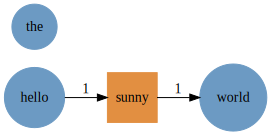

In [68]:
Graph(model)

### Serialize the model
Serialize the model to a JSON format, and then read it back into a new model

In [65]:
data_out = generate_json_acset(model)

OrderedCollections.OrderedDict{Symbol, Vector} with 4 entries:
  :T => NamedTuple{(:tname,), Tuple{Symbol}}[(tname = :sunny,)]
  :S => NamedTuple{(:sname,), Tuple{Symbol}}[(sname = :hello,), (sname = :the,)…
  :I => NamedTuple{(:it, :is), Tuple{Int64, Int64}}[(it = 1, is = 1)]
  :O => NamedTuple{(:ot, :os), Tuple{Int64, Int64}}[(ot = 1, os = 3)]

In [66]:
data_in = parse_json_acset(LabelledPetriNet, JSON.json(data_out))
""

""

### Visualiza the data we read back

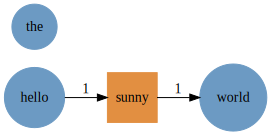

In [67]:
Graph(data_in)

In [69]:
# Further modify the model
add_parts!(data_in, :I, 1, it=1, is=2)

2:2

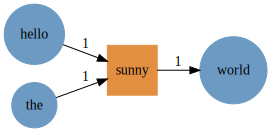

In [70]:
# Check we can see the modifications
Graph(data_in)

In [72]:
JSON.json(generate_json_acset(model))

"{\"T\":[{\"tname\":\"sunny\"}],\"S\":[{\"sname\":\"hello\"},{\"sname\":\"the\"},{\"sname\":\"world\"}],\"I\":[{\"it\":1,\"is\":1}],\"O\":[{\"ot\":1,\"os\":3}]}"

In [74]:
model.

LabelledPetriNet:
  T = 1:1
  S = 1:3
  I = 1:1
  O = 1:1
  it : I → T = [1]
  is : I → S = [1]
  ot : O → T = [1]
  os : O → S = [3]
  tname : T → Name = [:sunny]
  sname : S → Name = [:hello, :the, :world]